<a href="https://colab.research.google.com/github/Sofigam00s/Aprendizaje-Automatico-IA/blob/main/TP2_AA1_aprendizaje_no_supervisado_GAMALLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 AA1 Aprendizaje no supervisado

**Sofia Antonia Gamallo**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de clustering y reducción de dimensionalidad**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Clustering&skip=130&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas.  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

Para este trabajo voy a utilizar un dataset sobre la intencion de compra online de distintos usuarios.

El link al dataset es el siguiente:
https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

In [ ]:
#Comienzo cargando y leyendo el dataset
import pandas as pd
df = pd.read_csv('/content/online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Descripción del dataset
Es un conjunto de datos sobre 12330 sesiones de usuarios que navegaron por una tienda online. La función de este dataset es poder predecir si un usuario efectuará una compra en base a como realiza su navegación por la tenda online.

### Descripción de las variables:
* Administrative: número de páginas administrativas visitadas durante la sesión. Es de tipo numérica discreta.

* Administrative duration: tiempo total en segundos que el usuario paso en páginas administrativas. Es de tipo numérica continua.

* Informational: número de páginas informativas visitadas durante la sesión. Es de tipo numérica discreta.

* Informational duration: tiempo total en segundos que el usuario paso en páginas informativas. Es de tipo numérica continua.

* Product related: número de páginas de productos visitadas durante la sesión. Es de tipo numérica discreta.

* Product related duration: tiempo total en segundos que el usuario pasó en páginas de productos. Es de tipo numérica continua.

* Bounce rates: porcentaje de usuarios que entran a la página y se van sin interactuar. Es de tipo numérica continua.

* Exit rates: porcentaje de usuarios que salen desde una página específica. Es de tipo numérica continua.

* Page values: valor economico promdio asignado a las páginas visitadas. Es de tipo numérica continua.

* Special day: indica la proximidad de la visita al sitio a un día especial. Es de tipo numérica continua.

* Month: mes en que se hizo la sesión. Es de tipo categórica nominal.

* Operating systems: sistema operativo utilizado durante la sesión. Es de tipo categórica ordinal.

* Browser: navegador web utilizado. Es de tipo categórica ordinal.

* Region: región geográfica del usuario. Es de tipo categórica nominal.

* Traffic type: tipo de tráfico. Es de tipo categórica nominal.

* Visitor type: tipo de visitante, si es nuevo o frecuente. Es de tipo categórica nominal.

* Weekend: indica si la sesión ocurrió en fin de semana. Es de tipo categórica binaria.

* Revenue: indica si se realizo una compra. Es de tipo categórica binaria.


# 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           



> Con la función info se puede ver que no hay valores nulos en las features y casi todas son numéricas a excepción de Month y VisitorType.



In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


La función describe muestra una distribución de los datos que está muy sesgada. Esto se puede ver con la desviación estándar que en algunas variables como Administrative duration o Producto related duration es muy alta, y también en ladiferencia de valores que hay entre la media(mean) y la mediana(50%), lo que quiere decir que se necesita un buen prepocesamiento de los datos, para que los análisis tengan un buen resultado.

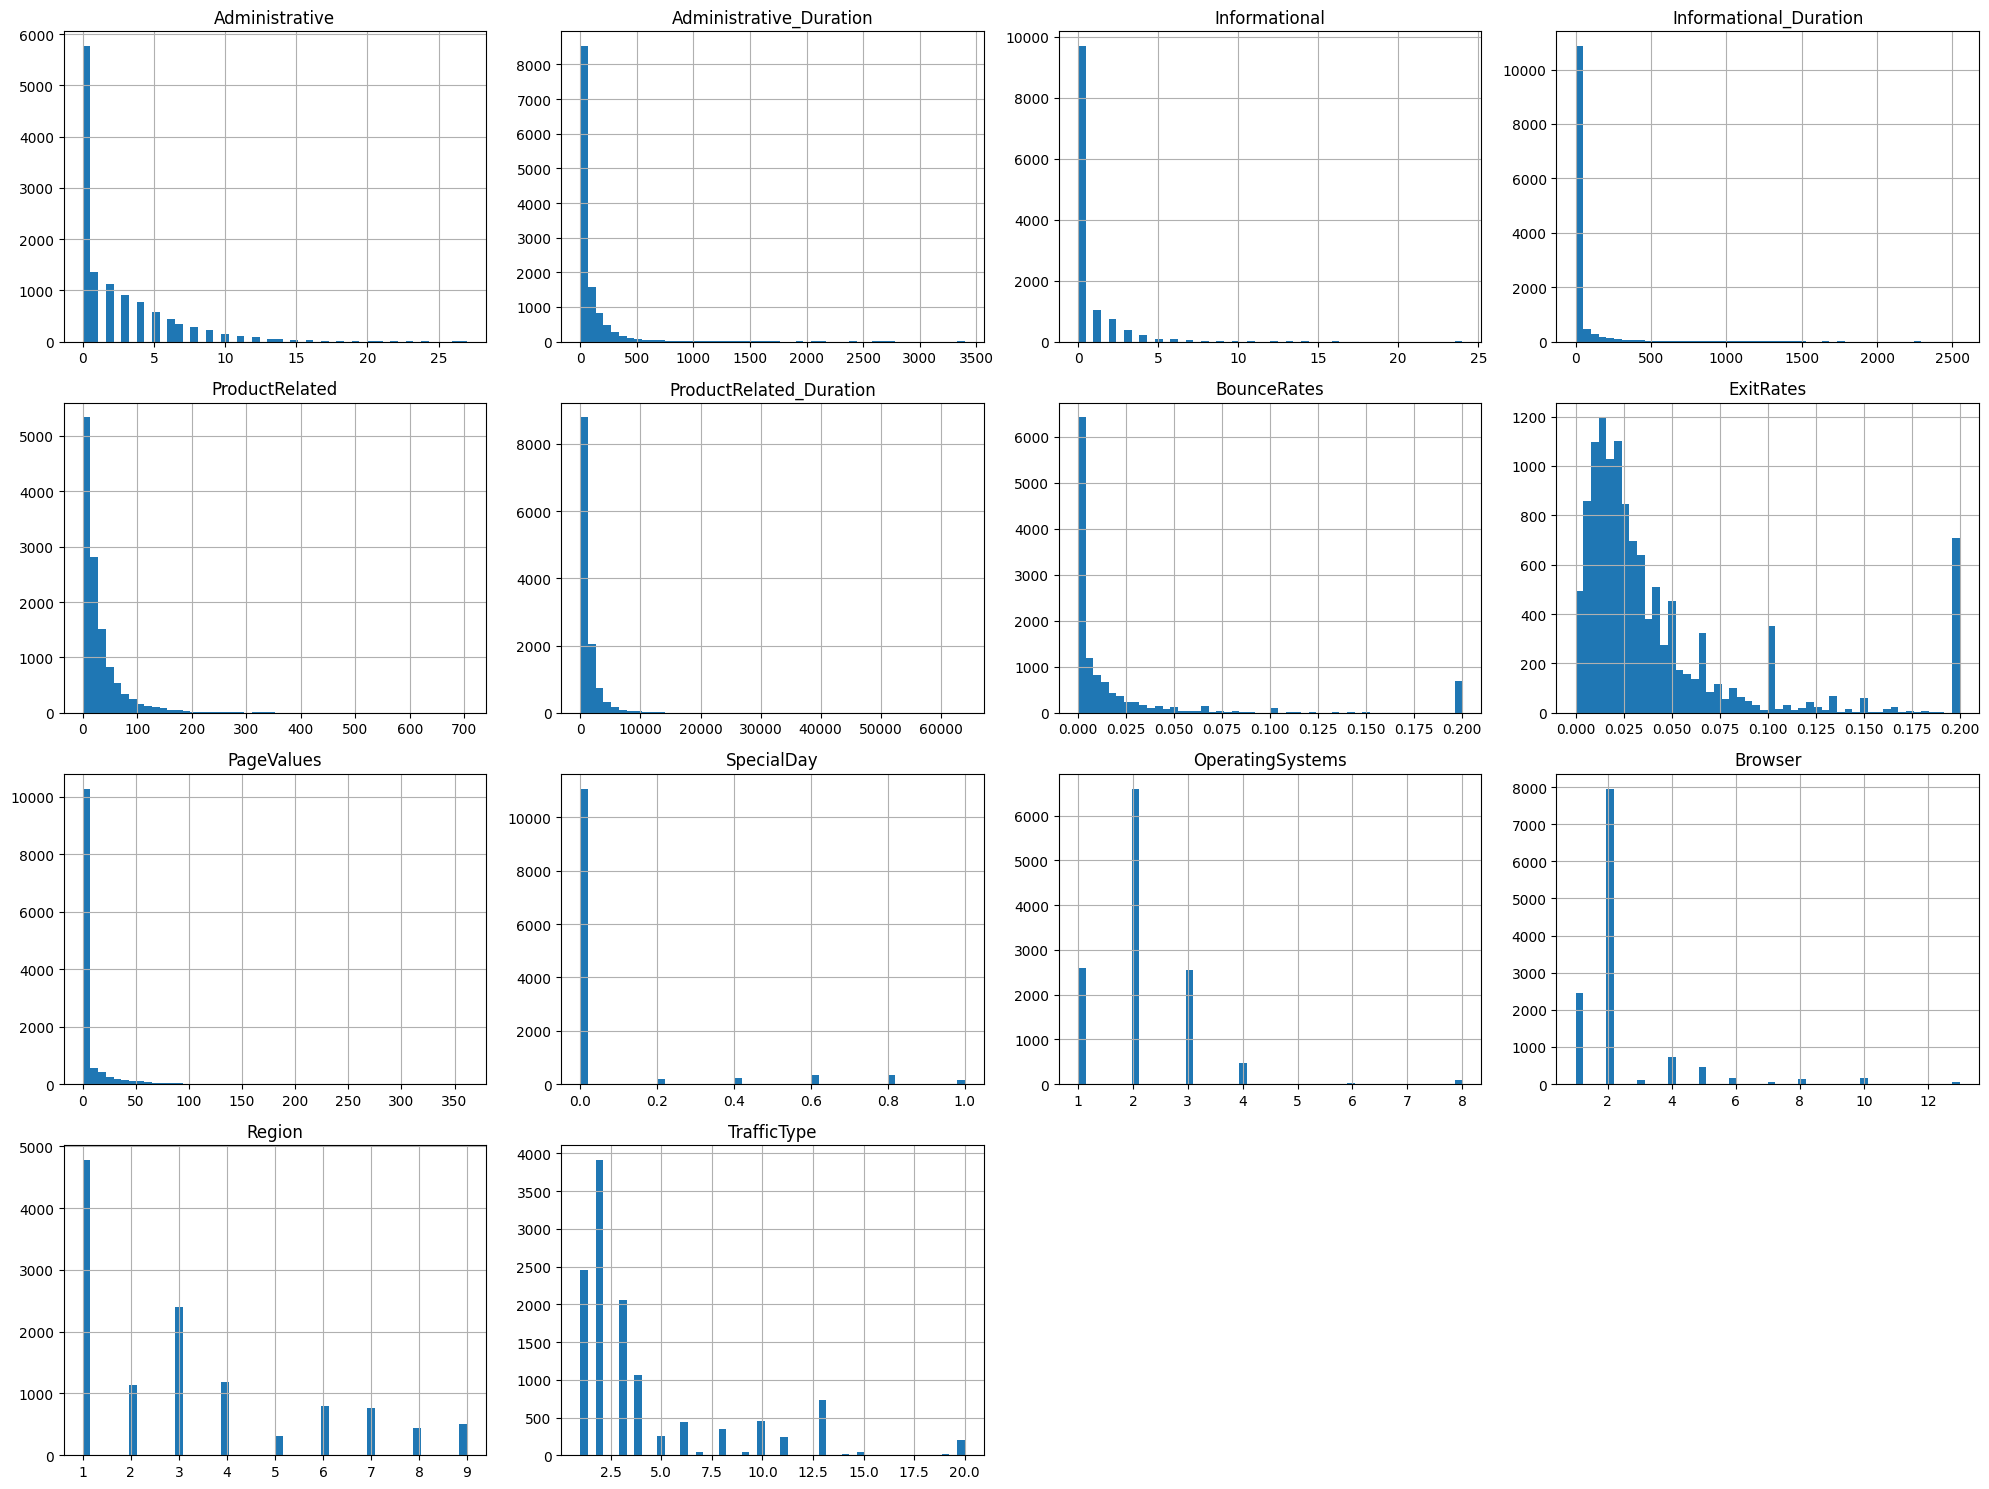

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()



> El historigrama refleja correctamente los valores sesgados que arrojaba la función .describe(). Muchas variables tienen una concentración de los datos en valores muy bajos, que en este dataset se refleja como los usuarios pasan poco tiempo en la tenda online, generan pocas interacciones y realizan muy pocas compras.



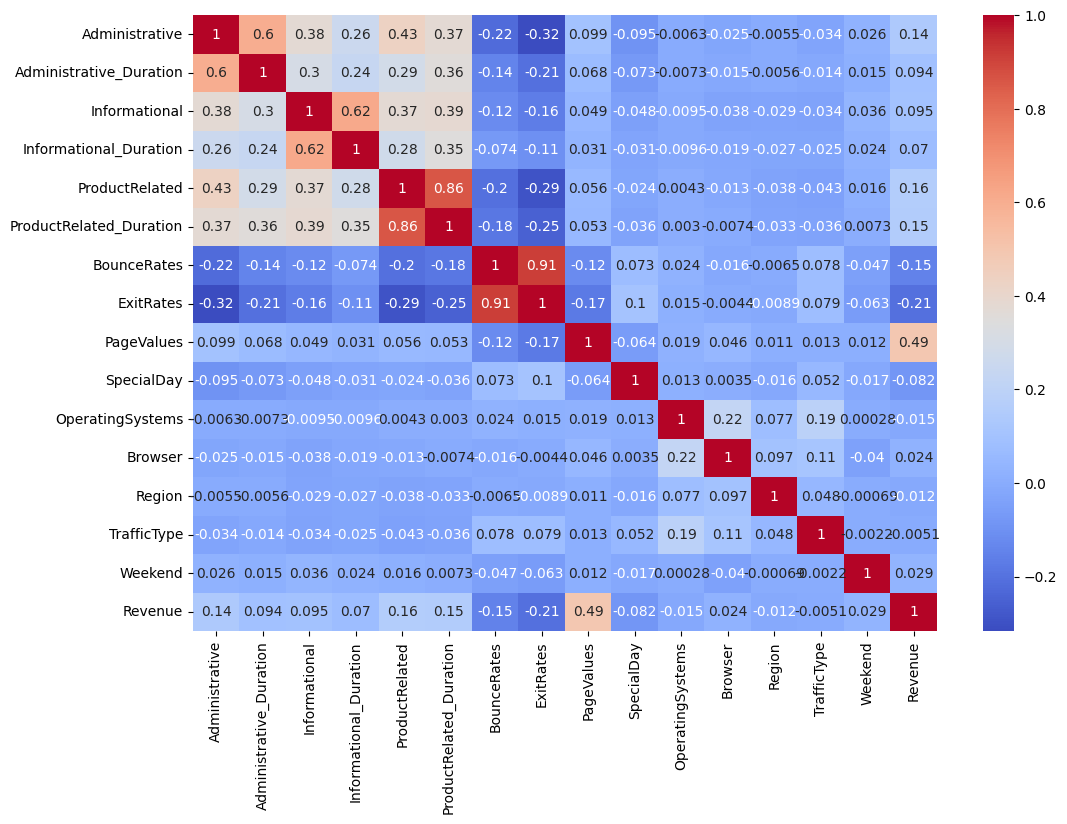

In [ ]:
# Grafico mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt # Import matplotlib.pyplot as it's used later

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number', 'bool'])
plt.figure(figsize=(12,8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

La matriz muestra en general muy poca correlación entre las variables, pero es positivo para este análisis porque puede aportar información diferente.

Puedo notar que hay features que tienen nua correlación altamente positiva (BounceRate con ExitRates y PorductRelated con ProductRelated_Duration) lo que puede significar que tener a las dos variables pueda generar redundancia y ruido en el análisis, por lo tanto son candidatas para eliminarlas posteriormente. Además, estas variables correlacionadas tienen una relación similar con Revenue, lo cual refuerza la idea de que mantener ambas no aporta demasiado valor.



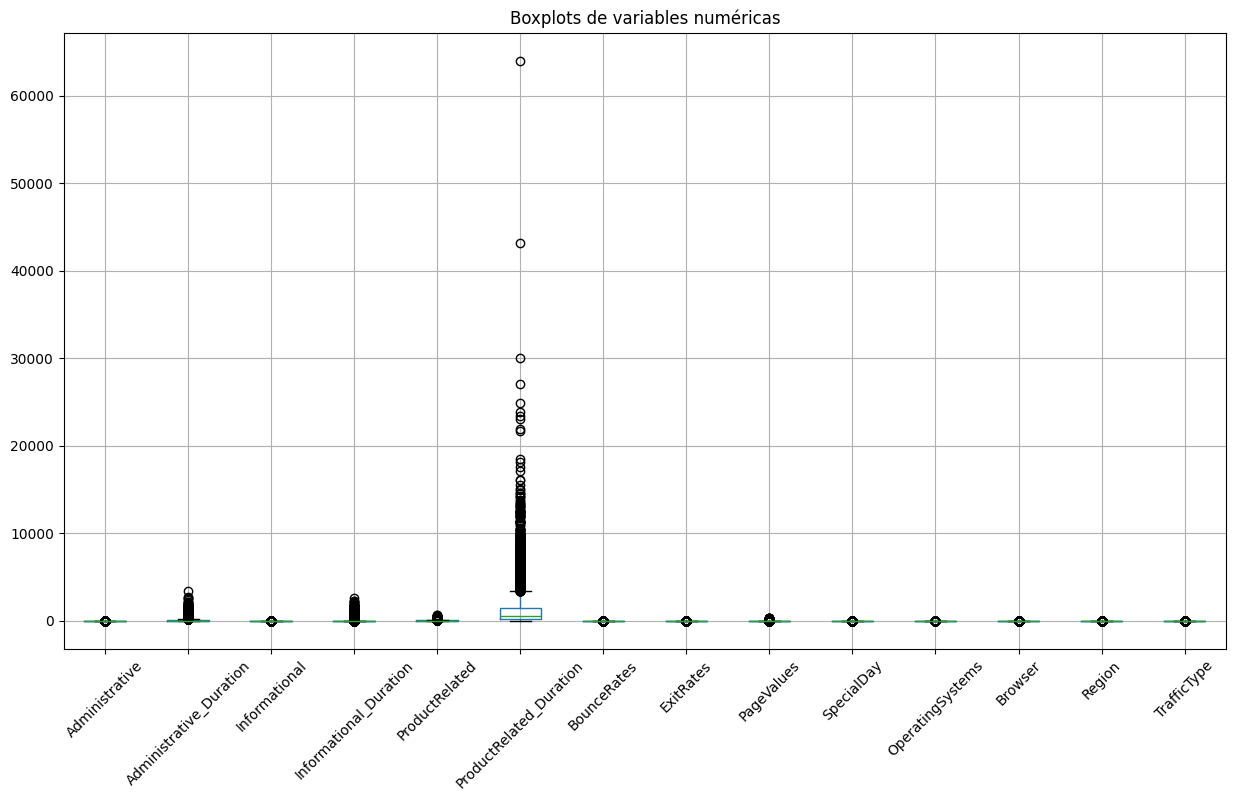

In [ ]:
#Boxplot para variables númericas
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15,8))
df[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots de variables numéricas")
plt.show()

El grafico mustra como todas las variables tienen algunos valores de outliers. Sin embargo, ProductReated_Duration tiene valores demasiado altos, y le siguen las variables Administrative Duration e Informational Duration. Esto puede afectar el análisis de clustering, sobre todo Kmeans que es muy sensible a estos valores atípicos.


# 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - El objetivo de este paso es quedar con variables todas numéricas y en la misma escala.

## Resolución:

###Valores nulos

In [ ]:
df.isnull().sum()


,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0




>El dataset no prensenta valores nulos, por lo tanto hace falta eliminarlo o imputarlos.



###Manejo de outliers

Solo voy a estar elimando los outlier de lavariable Product Related Duration porque es la que más valores atípicos tiene.

In [ ]:
# Código inspirado del colab de prpocesamiento titanic

columnas_outliers = ['ProductRelated_Duration']


# Guardar el tamaño original para ver cuantas filas se eliman despues
original_size = len(df)

# Bucle para recorrer las filas de la columna elegida y eleimanr los outliers
for col in columnas_outliers:
    Q1 = df[col].quantile(0.20)
    Q3 = df[col].quantile(0.80)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

# Mostrar cuántas filas se eliminaron
print(f"Filas eliminadas por outliers: {original_size - len(df)} ({(original_size - len(df))/original_size*100:.2f}%)")

Filas eliminadas por outliers: 636 (5.16%)


###Eliminar columnas

Voy a eliminar una de cada columna que tiene una correlación bastante alta con la otra, ya que tienen una información bastante similar y puede gnerar un análisis redundante:
* Administrative
* Informational
* BounceRates
* ProductRelated

Las otras columnas que voy a eliminar son irrelevantes para el objetivo de mi target, en el cual importan los comportamientos de navegación, y estas columnas no aportan ese tipo de infrmación:
* Operating Sytstems
* Browser
* Region

In [ ]:
df = df.drop(columns=['Administrative', 'Informational', 'BounceRates', 'ProductRelated', 'OperatingSystems', 'Browser', 'Region'])
df.columns


Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'ExitRates', 'PageValues', 'SpecialDay',
       'Month', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

###Variables categóricas

Si me voy a quedar con las features categóricas porque pueden capturar patrones importantes en cuanto a la fecha en que se realiza una compra, y el tipo de usuario también es importante. Las varables categóricas son:
* Month
* Visitor Type

In [ ]:
# Convertir variables booleanas a numéricas
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

In [ ]:
# Encontrar todos los valores para la collumna del mes
df['Month'].unique()


array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [ ]:
# Encontrar todos los valores para la columna de tipo de visitante
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [ ]:
# Pasar a números todos los valores de las columnas con la función .map
df['Month'] = df['Month'].map({'Feb': 0, 'Mar': 1, 'May': 2, 'June': 3, 'Jul': 4, 'Aug': 5, 'Sep': 6, 'Oct': 7, 'Nov': 8, 'Dec': 9})
df['VisitorType'] = df['VisitorType'].map({'New_Visitor': 0, 'Returning_Visitor': 1, 'Other': 2})
#Verificar que las features esten ennumeradas
df

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,0.200000,0.000000,0.0,0,1,1,0,0
1,0.0,0.0,64.000000,0.100000,0.000000,0.0,0,2,1,0,0
2,0.0,0.0,0.000000,0.200000,0.000000,0.0,0,3,1,0,0
3,0.0,0.0,2.666667,0.140000,0.000000,0.0,0,4,1,0,0
4,0.0,0.0,627.500000,0.050000,0.000000,0.0,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
12325,145.0,0.0,1783.791667,0.029031,12.241717,0.0,9,1,1,1,0
12326,0.0,0.0,465.750000,0.021333,0.000000,0.0,8,8,1,1,0
12327,0.0,0.0,184.250000,0.086667,0.000000,0.0,8,13,1,1,0
12328,75.0,0.0,346.000000,0.021053,0.000000,0.0,8,11,1,0,0


###Escalar variables

In [ ]:
# Separar la variable target
y = df['Revenue']
X = df.drop(columns=['Revenue'])


In [ ]:
from sklearn.preprocessing import StandardScaler
#Estandarizar el modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)





# 4. **Clustering**  
   

En este apartado aplicará clustering sobre los datos obtenidos del paso 3)

### 4.1 -  K-means
   - Determine el número ideal de clústers usando Silhoutte Score.
   - Aplique K-means sobre los datos procesados del grupo anterior.
   

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

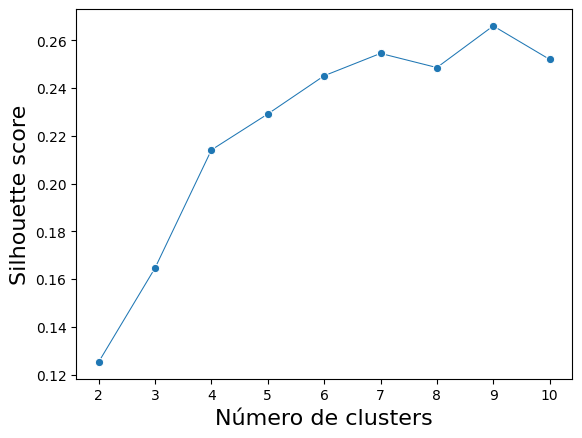

In [ ]:
sil=[]
k_values=range(2,11); # Rango de valores que se van a probar

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) #Se establecen los parametros
    kmeans.fit(X_scaled) #Se entrena el modelo
    score=silhouette_score(X_scaled,kmeans.labels_) #Se calcula el coeficiente
    sil.append(score) # Se agrega a la variable creada

#Se crea eñ gráfico
sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False);
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16);



> El valor óptimo de clústeres es el 9



### 4.2 Análisis intra-clúster

Para el modelo de K-means con el valor de k (número de clústeres) ideal, analice los datos que pertenecen a cada clústers. ¿Cuáles son sus características / distribución? Puede usar gráficas como box-plots

In [ ]:
# Entrenar el modelo con 9 clusters
kmeans = KMeans(n_clusters=9, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Asignar etiquetas al dataset original
df['cluster'] = kmeans.labels_


In [ ]:
# Ver la distribución de los clusters
print("Distribución de los clusters:")
print(df['cluster'].value_counts().sort_index())

# Ver las características promedio de cada cluster
print("\nCaracterísticas promedio por cluster:")
print(df.groupby('cluster').mean())

Distribución de los clusters:
cluster
0    1061
1    3933
2     872
3    1316
4     907
5    1448
6     163
7     384
8    1610
Name: count, dtype: int64

Características promedio por cluster:
         Administrative_Duration  Informational_Duration  \
cluster                                                    
0                      48.950249               10.548483   
1                      38.914303               10.327810   
2                       0.106193                0.033257   
3                     261.418590               51.701903   
4                      28.264402               10.323704   
5                      83.238958               13.321382   
6                     176.355514              817.679108   
7                      85.011062               19.446341   
8                      58.180024               17.868195   

         ProductRelated_Duration  ExitRates  PageValues  SpecialDay     Month  \
cluster                                                          

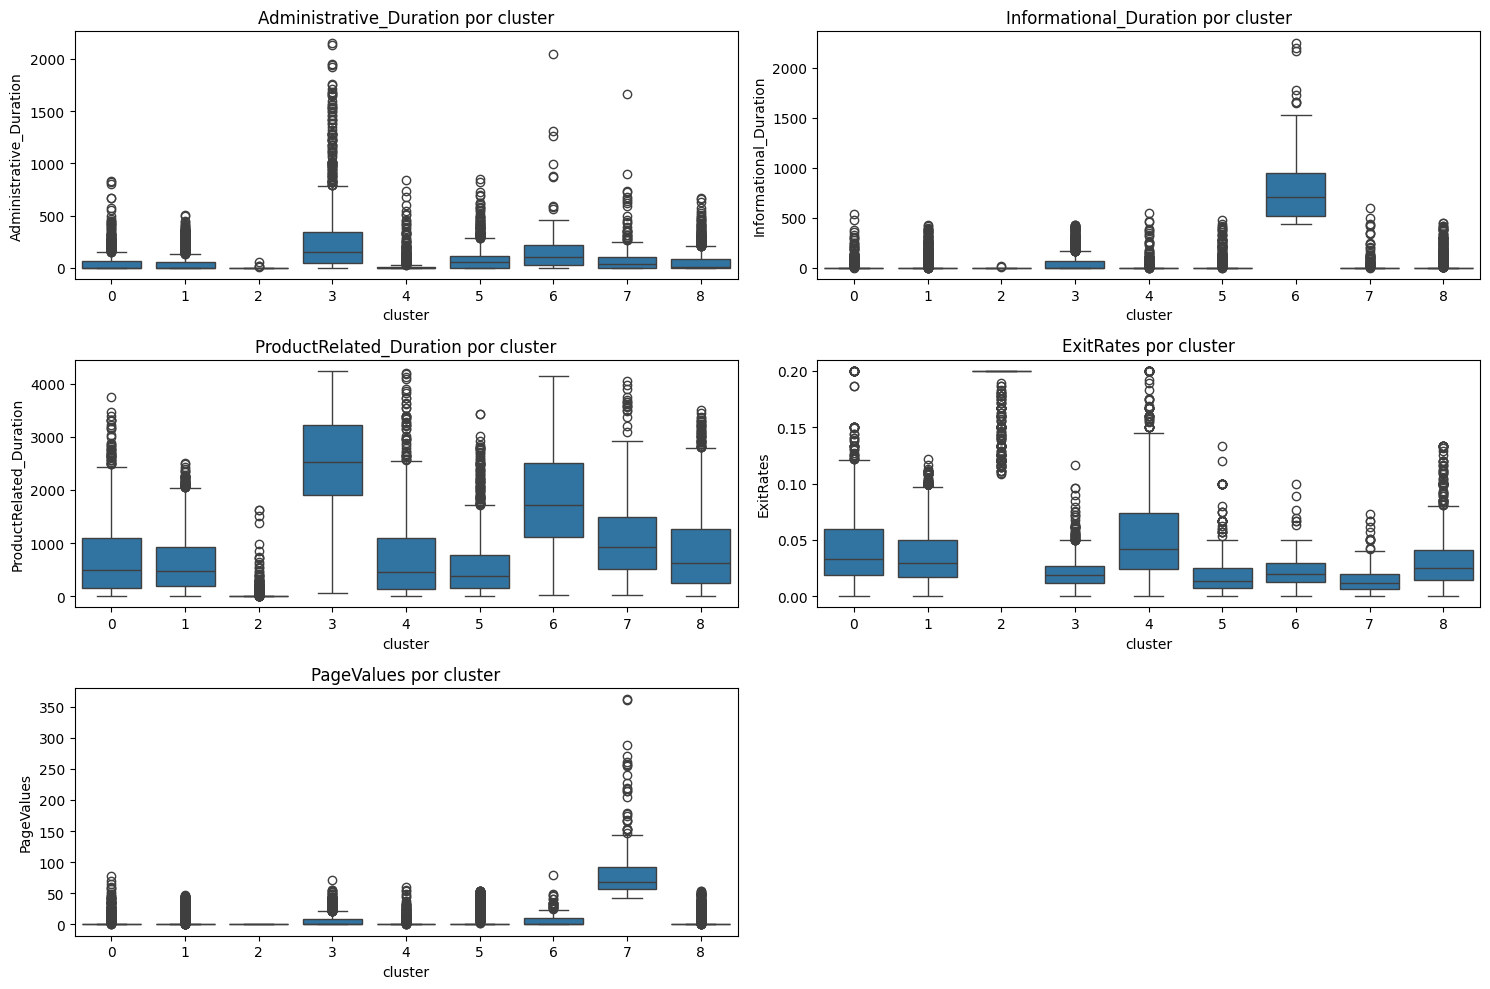

In [ ]:
# Seleccionar algunas variables importantes para hacer algunas visualizacioens
variables_importantes = ['Administrative_Duration', 'Informational_Duration',
                         'ProductRelated_Duration', 'ExitRates', 'PageValues']

plt.figure(figsize=(15, 10))
for i, col in enumerate(variables_importantes):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='cluster', y=col, data=df)
    plt.title(f'{col} por cluster')
plt.tight_layout()
plt.show()

### Interpretación de los Clusters

####Análiis de los clústeres determinando el tipo de usuario:

* **Usuarios rebotadores:**
	* **Clúster 2 (872 usuarios):** tiene el porcentaje de compra más bajo(0,3%). Su interacción en la tienda online es muy escasa(apenas 34 segundos en páginas de productos) y su exit rate es el más alto de todos los cústeres (0.186). Se pueden interpretar como usuarios que llegaron sin querer a la tienda(un click en un anuncio) o no encontraron lo que buscaban.

* **Usuarios de días especiales:**
	* **Clúster 4 (907 usuarios):** tienen el porcentaje de visitas en días especiales más alto(0.70) pero su porcentaje de compra sigue siendo bajo (5,7%). Pasan un tiempo promedio moderado en páginas de productos. Se puede interpretar que son usuarios que llegan en los días especiales para conocer las promociones pero no terminan comprando mucho.

* **Usuarios casuales:**
	* **Clúster 1 (3933 usuarios):** es el clúster más grande. Tienen un tempo moderado en todos los tipos de páginas y un porcentaje de compra un poco más alto que los clústeres anteriores (9,4%). Representa un tipo de usuario promedio en la tenda online, al tener una cantidad tan grande.

	* **Clúster 0 (1061 usuarios):** también tiene un tiempo moderado en todas las páginas (no solo en la de productos), y su porcentaje de compra es del 10,7%. Es muy similar al cluster 1 por lo que también reprenta un usuario promedio con un porcentaje un poco más alto de compra.

* **Usuarios de fin de semana:**
	* **clúster 8 (1610 usuarios):** todos estos usuarios visitan la tienda los fines de semana (ya que su agrupación en weekend es igual a 1), pasan un tiempo un poco mayor al promedio en páginas de producto (846 segundos) y su porcentaje de compra es moderadamente alto (14,3%). Se pueden interpretar como usuarios nuevos que pasan sus días libres en la tienda online.

* **Usuarios frecuentes:**
	* **Clúster 5 (1448 usuarios):** todos los usuarios de este clúster son visitantes nuevos (porque el visitortype = 0). Tiene un porcentaje de compra moderado y un algo alto para ser visitantes que ingresan por primera vez (19,7%). Pasan un tiempo moderado en las paginas de productos. Se pueden interpretar como nuevos usuarios que se interesan por los productos de la tienda.

* **Usuarios que navegan mucho:**
	* **Clúster 3 (1316):** estos usuarios tienen el tiempo más alto en páginas de productos (2527 segundos) y su porcentaje de compra es moderado (22.4%). Tambipen pasan más tiempo en páginas administrativas. Se pueden interpretar como usuarios que investigan mucho y buscan productos específicos o comparan opciones.

* **Usuarios que investigan mucho:**
	* **Clúster 6 (163 usuarios):** son un tipo de usuario muy específico ya que son pocos a comparación de otros clústeres. Tienen el mayor tiempo en páginas informativas (817 segundos) y también un tiempo alto en paginas de productos (1864 segundos). Su porcentaje de compra es más alto que el resto (22,7%). Se pueden interpretar como usuarios que investigan mucho la tienda online antes de comprar, tal vez las formas de pago y entrega, además de mirar detalladamente los productos.

* **Usuarios fieles (con mayo valor):**
	* **Clúster 7 (384 usuarios):** este clúster se lleva el mayor porcentaje de compra (80,2%) y a su vez tiene muy poca cantidad de usuarios. Pasan astante tiempo en páginas de productos (1129 segundos) y su exitrate es el mas bajo de todos (0,014). Además tambien tienen el mayor porcentaje de las páginas de valor (PagesValues = 83,65). Se pueden interpretar como los usuarios más fieles a la tienda, que están muy enfocados en realizar una compra.

# 5- Reducción de dimensionalidad

### 5.1 Aplicar PCA o t-SNE para reducir la dimensionalidad a 2D/3D y visualizar los datos

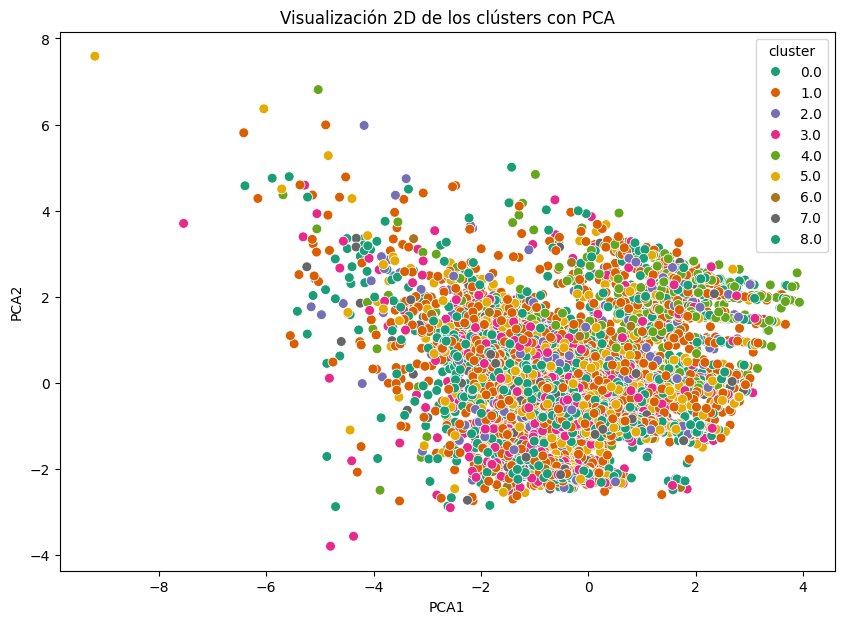

Varianza explicada por cada componente:
[0.18515439 0.12588278]
Varianza total explicada: 31.10%


In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA a los datos escalados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes y el clúster asignado
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df['cluster']

# Gráfico de dispersión por clúster
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='Dark2', s=50)
plt.title('Visualización 2D de los clústers con PCA')
plt.show()
# Ver cuánta varianza explican las componentes
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_) * 100:.2f}%")




> PCA en 2D para este dataset representa solo el 31,10% de los datos orgiinales, lo que significa que pierde una buena cantidad de información al reducirse.


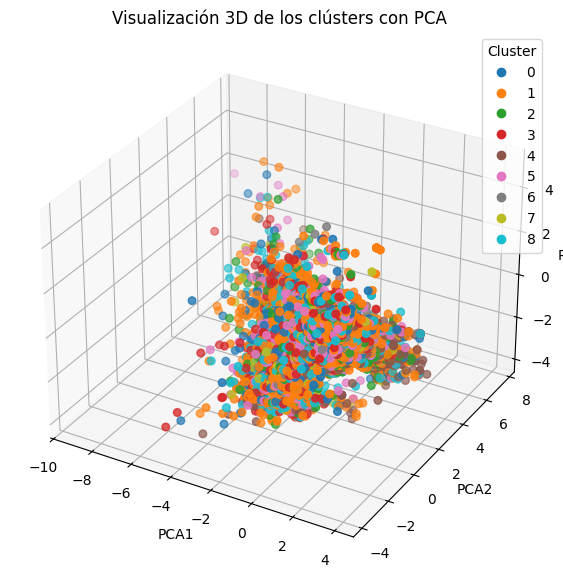

Varianza explicada por cada componente (3D):
[0.18515439 0.12588278 0.11231506]
Varianza total explicada: 42.34%


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# PCA a 3 componentes
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# DataFrame para graficar
df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca_3d['cluster'] = df['cluster']

# Gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df_pca_3d['PCA1'], df_pca_3d['PCA2'], df_pca_3d['PCA3'],
    c=df_pca_3d['cluster'], cmap='tab10', s=30
)
ax.set_title('Visualización 3D de los clústers con PCA')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend(*scatter.legend_elements(), title="Cluster", loc='upper right')
plt.show()

print("Varianza explicada por cada componente (3D):")
print(pca_3d.explained_variance_ratio_)
print(f"Varianza total explicada: {sum(pca_3d.explained_variance_ratio_) * 100:.2f}%")




> PCA en 3D para este dataset reprensenta el 42,34% de los datos originales, un poco mas que en el modelo 2D. De igua manera se siguen superponiendo los datos y no se puede visualizar correctamente los agrupamientos.


### 5.2 Clustering sobre datos reducidos

Aplicar clustering K-means sobre el dataset obtenido en 5.1. Realice los mismos pasos y análisis que realizó para el punto 4) pero con este dataset reducido.

#### Clustering para PCA en 2D

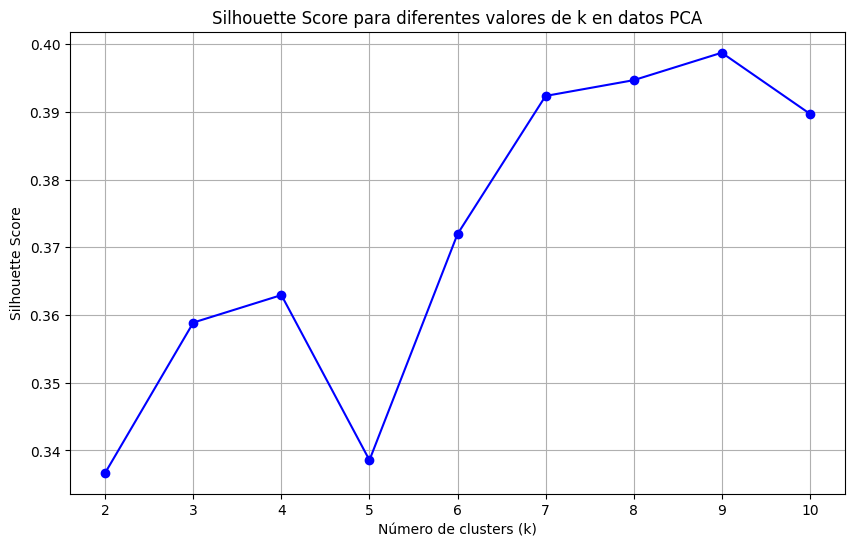

In [ ]:
#Determinar el número óptimo de clusters para los datos reducidos con PCA
sil_pca = []
k_values = range(2, 11)

for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans_pca.fit(X_pca)  # Aplicamos K-means a los datos reducidos por PCA
    score = silhouette_score(X_pca, kmeans_pca.labels_)
    sil_pca.append(score)

# Visualizar el Silhouette Score para determinar el k óptimo
plt.figure(figsize=(10, 6))
plt.plot(k_values, sil_pca, 'o-', color='blue')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes valores de k en datos PCA')
plt.grid(True)
plt.show()

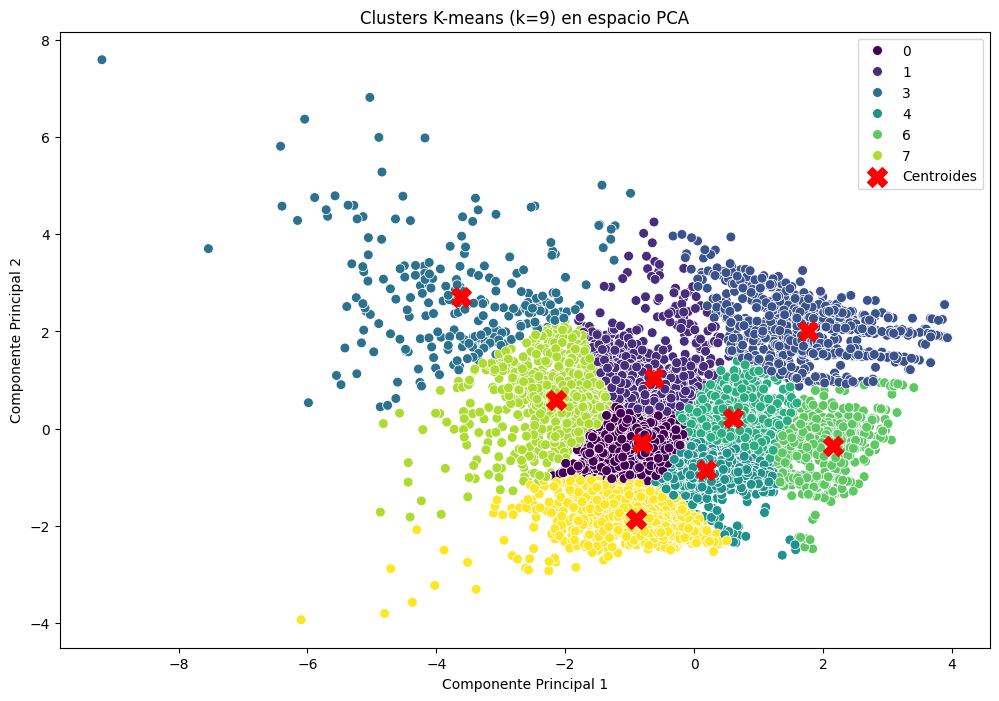

In [ ]:
#Aplicar K-means con el número óptimo de clusters
k_optimo_pca = 9

kmeans_pca = KMeans(n_clusters=k_optimo_pca, n_init=10, random_state=0)
cluster_labels_pca_2d = kmeans_pca.fit_predict(X_pca)

#Añadir las etiquetas al DataFrame
df['cluster_pca_2d'] = cluster_labels_pca_2d

#Visualizar los clusters en el espacio PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels_pca_2d, palette='viridis', s=50)
plt.title(f'Clusters K-means (k={k_optimo_pca}) en espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
# Añadir los centroides
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
            s=200, marker='X', c='red', label='Centroides')
plt.legend()
plt.show()


In [ ]:
#Calcular el Silhouette Score para ambos modelos para comparar
silhouette_original = silhouette_score(X_scaled, df['cluster'])
silhouette_pca = silhouette_score(X_pca, df['cluster_pca_2d'])

print(f"\nSilhouette Score para clustering original (k=9): {silhouette_original:.4f}")
print(f"Silhouette Score para clustering en datos PCA (k={k_optimo_pca}): {silhouette_pca:.4f}")


Silhouette Score para clustering original (k=9): 0.2660
Silhouette Score para clustering en datos PCA (k=9): 0.3987


In [ ]:
# Analizar las características de cada cluster
print(f"\nCaracterísticas promedio por cluster (PCA, k={k_optimo_pca}):")
print(df.groupby('cluster_pca_2d').mean())


Características promedio por cluster (PCA, k=9):
                Administrative_Duration  Informational_Duration  \
cluster_pca_2d                                                    
0                             94.506215               18.610559   
1                            122.499670               51.571042   
2                             14.907402                6.084453   
3                            594.557518              506.932830   
4                             24.395981                2.146390   
5                             24.218899                4.056538   
6                              0.340433                0.071117   
7                            235.646204               90.473906   
8                             64.022003                5.461560   

                ProductRelated_Duration  ExitRates  PageValues  SpecialDay  \
cluster_pca_2d                                                               
0                           1244.995056   0.020300   10.

#### Clusterning para PCA en 3D

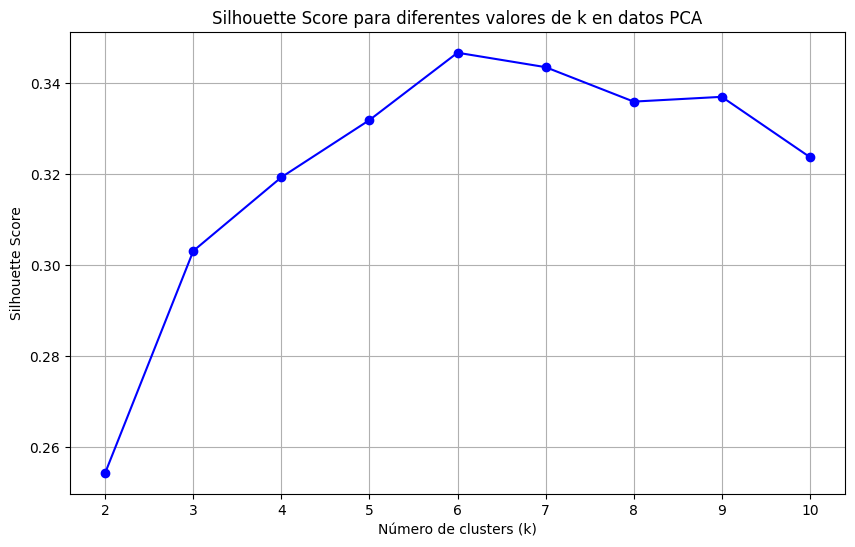

In [ ]:
sil_pca = []
k_values = range(2, 11)

for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans_pca.fit(X_pca_3d)  # Aplicamos K-means a los datos reducidos por PCA
    score = silhouette_score(X_pca_3d, kmeans_pca.labels_)
    sil_pca.append(score)

# Visualizar el Silhouette Score para determinar el k óptimo
plt.figure(figsize=(10, 6))
plt.plot(k_values, sil_pca, 'o-', color='blue')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes valores de k en datos PCA')
plt.grid(True)
plt.show()

In [ ]:
# Aplicar K-means con el número óptimo de clusters
k_optimo_pca_3d = 6

kmeans_pca_3d = KMeans(n_clusters=k_optimo_pca_3d, n_init=10, random_state=0)
cluster_labels_pca_3d = kmeans_pca_3d.fit_predict(X_pca_3d)

#Añadir las etiquetas al DataFrame
df['cluster_pca_3d'] = cluster_labels_pca_3d

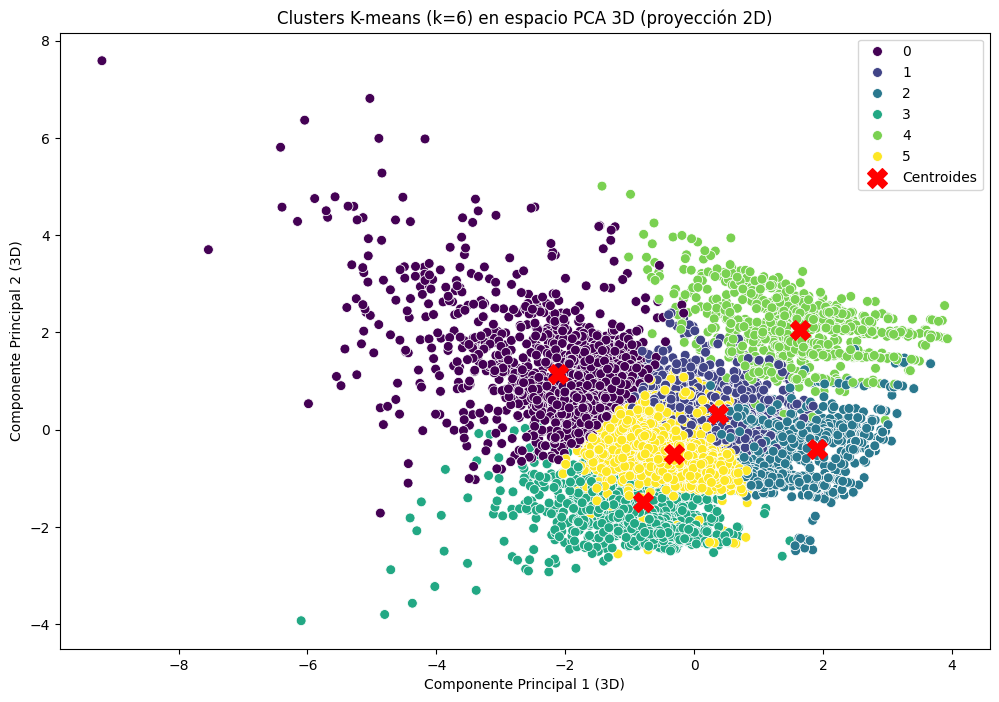

In [ ]:
#Visualizar los clusters en el espacio PCA 3D (proyectado en 2D)
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca_3d[:, 0], y=X_pca_3d[:, 1], hue=cluster_labels_pca_3d, palette='viridis', s=50)
plt.title(f'Clusters K-means (k={k_optimo_pca_3d}) en espacio PCA 3D (proyección 2D)')
plt.xlabel('Componente Principal 1 (3D)')
plt.ylabel('Componente Principal 2 (3D)')
# Añadir los centroides (solo las dos primeras dimensiones)
plt.scatter(kmeans_pca_3d.cluster_centers_[:, 0], kmeans_pca_3d.cluster_centers_[:, 1],
            s=200, marker='X', c='red', label='Centroides')
plt.legend()
plt.show()

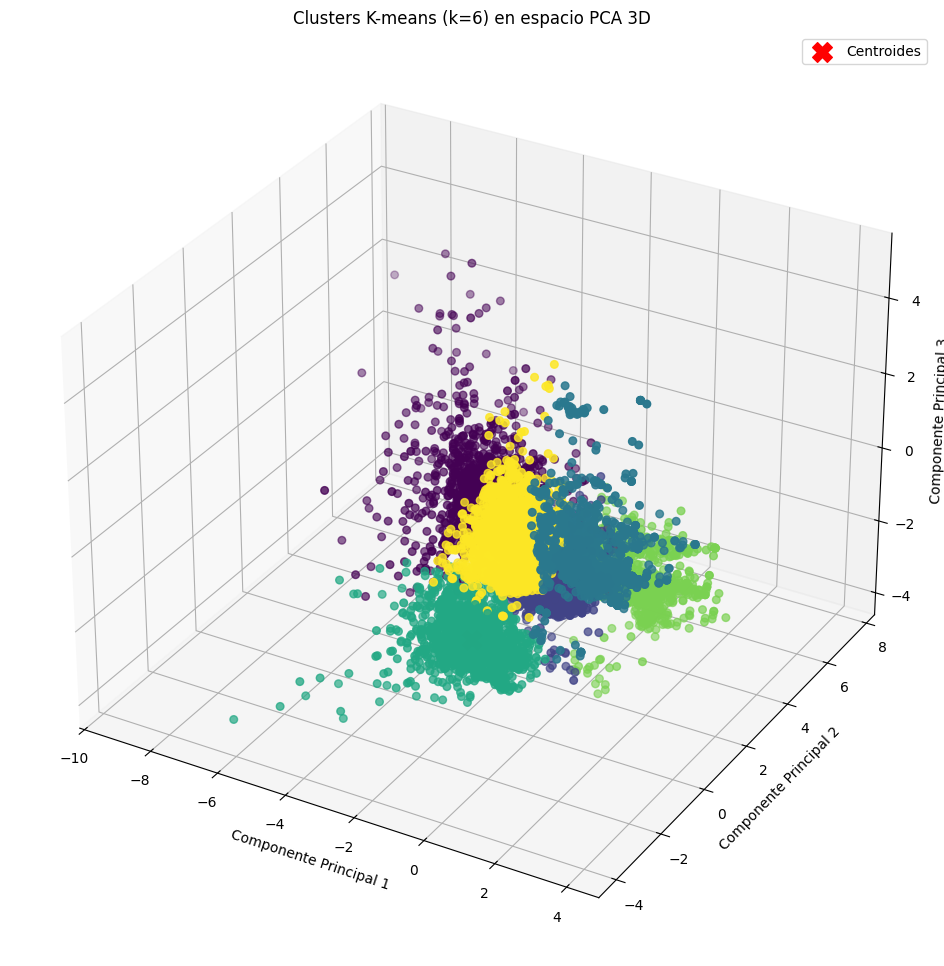

In [ ]:
# Para una visualización 3D
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=cluster_labels_pca_3d, cmap='viridis', s=30
)
# Añadir los centroides en 3D
ax.scatter(
    kmeans_pca_3d.cluster_centers_[:, 0],
    kmeans_pca_3d.cluster_centers_[:, 1],
    kmeans_pca_3d.cluster_centers_[:, 2],
    c='red', marker='X', s=200, label='Centroides'
)
ax.set_title(f'Clusters K-means (k={k_optimo_pca_3d}) en espacio PCA 3D')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.legend()
plt.show()

In [ ]:
#Calcular el Silhouette Score para ambos modelos para comparar
silhouette_original = silhouette_score(X_scaled, df['cluster'])
silhouette_pca_2d = silhouette_score(X_pca, df['cluster_pca_2d'])
silhouette_pca = silhouette_score(X_pca_3d, df['cluster_pca_3d'])

print(f"\nSilhouette Score para clustering original (k=9): {silhouette_original:.4f}")
print(f"Silhouette Score para clustering en datos PCA 2D (k=9): {silhouette_pca_2d:.4f}")
print(f"Silhouette Score para clustering en datos PCA 3D (k={k_optimo_pca_3d}): {silhouette_pca:.4f}")


Silhouette Score para clustering original (k=9): 0.2660
Silhouette Score para clustering en datos PCA 2D (k=9): 0.3987
Silhouette Score para clustering en datos PCA 3D (k=6): 0.3467


In [ ]:
#Analizar las características de cada cluster
print(f"\nCaracterísticas promedio por cluster (PCA, k={k_optimo_pca_3d}):")
print(df.groupby('cluster_pca_3d').mean())


Características promedio por cluster (PCA, k=6):
                Administrative_Duration  Informational_Duration  \
cluster_pca_3d                                                    
0                            275.413304              160.347125   
1                             41.234088                9.215822   
2                              3.133512                0.182276   
3                             78.988463               11.229507   
4                             24.185171                9.396516   
5                             54.085072               10.345977   

                ProductRelated_Duration  ExitRates  PageValues  SpecialDay  \
cluster_pca_3d                                                               
0                           2463.752634   0.019354   12.398340    0.011352   
1                            666.981486   0.033389    3.210869    0.015255   
2                             91.059640   0.147744    0.059190    0.017360   
3                      

# 6- Conclusiones

Escriba sus conclusiones comparando los resultados y experiencia entre aplicar clustering a todo el dataset vs al dataset reducido.

Discutir:

* ¿ Los clústeres se corresponden con clases reales ( si las hay)?
* ¿ La reducción de dimensionalidad mejoró o empeoró el desempeño del clustering?

Fundamente, justifique con sus palabras.

Al realizar el primer clustering me resulto dificil enteder a que tipo de usuario correspondía cada grupo, pero una vez que analice mejor cada variable, pude indetificar comportamientos sólidos dentro de los clústeres. Aunque el silohuette score fue bajo (0,266) considero que los grupos formados representan de forma razonable como podrían interactuar distintos usuarios en una tienda online.

Al aplicar PCA en 2D y 3D note que la varianza explicada era baja (un 31% para 2D y 42% para 3D), investigando entendí que esto no significa que el resultado era malo, sino que el dataset tiene muchas variables y poca correlación, lo que hace lógico que la información este distribuida en varias dimensiones. Es decir, el PCA no captura todo, pero si lo más importante para repsentar tendencias generales.

Algo que me llamó mucho la atención, fue que el PCA 2D tuvo mejor silohuette score que el PCA 3D, a pesar de que la varianza explicada era menor. Al principio me pareció contradictorio, pero despues de investigar me di cuenta que estas estadísticas no estan relacionadas entre si. La varianza explicada muestra cuanta información retiene el PCA, mientras que el silohuette score evalua que tan separado están los clústeres, los que no siempre coinciden.

En cuanto a la distribución de usuarios, el cluster en PCA 2D mantuvo una estructura parecida al clustering original, con clústeres similirades en el orden y el comportamiento de usuarios. En cambio, en PCA 3D, al usar solo 6 clústeres la distribución fue diferentes y las varables quedaron más equilibradas dentro de cada grupo.

* **¿Los clústeres se correponden a clases reales?**
  En mi opinión si, los tres modelos reflejan tipos reales de usuarios. Por ejemplo, personas que navegan durantes eventos como el HOT-SALE pero no compran, o usuarios que entran y se van rápido despues de hacer click en un anuncio sin querer. Estos comportamiento se explican el los clústeres, lo cual afirma que los grupos no se generaron aleatoriamente, sino que captan patrones reales de uso.

* **¿La reducción de dimensionalidad mejoró el clustering?**
  Si, y bastante. El silohuette score subio de 0.266 a 0.399 en PCA 2D (un 50%) y 0.347 en PCA 3D (30%). Esto indica que al reducir el espacio se eliminaron variables con ruido o poco relevantes, lo que permitió una mejor separación de los clústeres. También pudo haber ayudado a compensar por los outliers que no eleminé por completo anteriormente. En resumen, el PCA mejoró la caldad del clustering.

# 7- Bonus: elija una de las siguientes consignas para resolver.



## 7.1 Aplicar DBSCAN sobre su dataset.

Aplique clustering con DBSCAN sobre su dataset en ambas versiones: el dataset completo y reducido (PCA o t-SNE). Evalue los resultados.

## 7.2 Análisis de outliers

- Usar DBSCAN para detectar los outliers en su dataset.
- Reducir la dimensionalidad y verificar si los outliers son identificables visualmente en 2D/3D.
- Escriba sus reflexiones: ¿ los outliers forman un clúster propio? ¿PCA / t-SNE preserva las anomalías?

Elegí este punto porque en este dataset deje muchos outliers y sería interesante ver como el modelo DBSCAN los detecta.

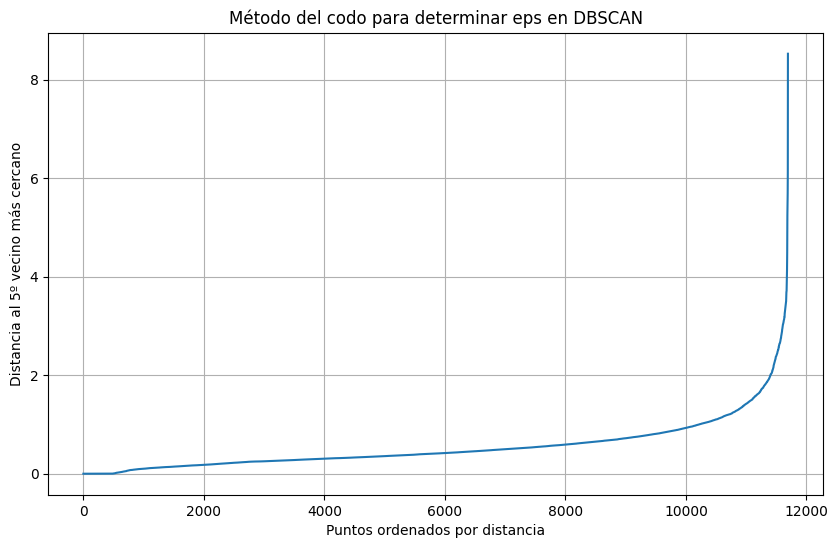

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Calcular distancias al vecino más cercano
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Ordenar distancias para encontrar el codo
distances = np.sort(distances[:, 4])  # Distancia al 5 vecino más cercano

# Graficar para encontrar el codo
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Método del codo para determinar eps en DBSCAN')
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia al 5º vecino más cercano')
plt.grid(True)
plt.show()



> El gráfico del codo muestra un valor epsilon óptimo alredor del punto 1.5




Número de outliers detectados por DBSCAN: 371 (3.17%)


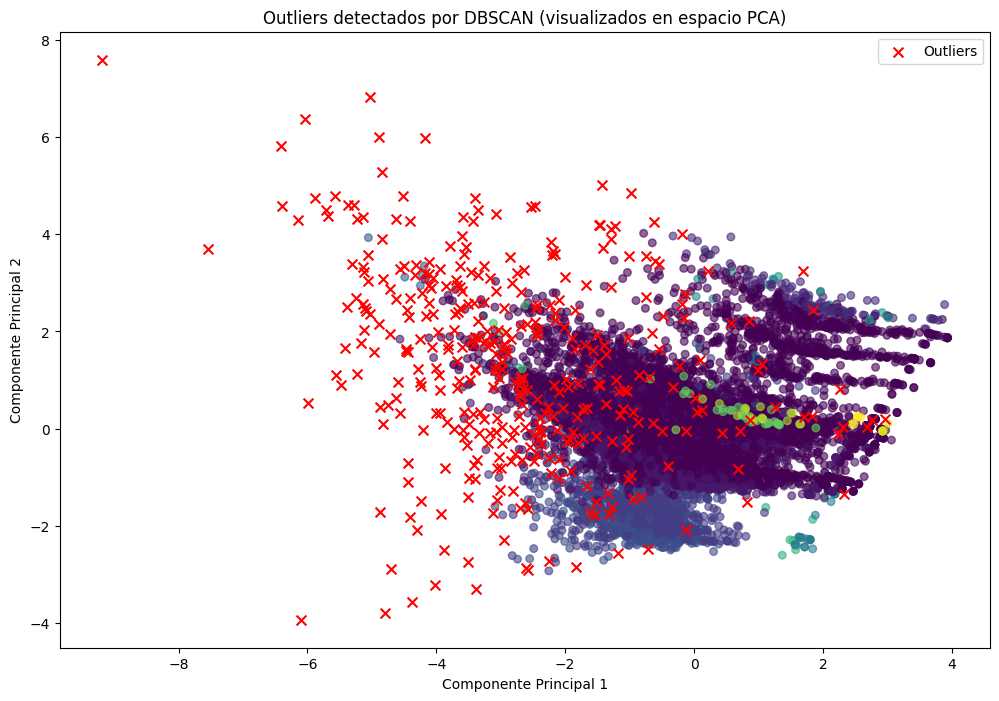


Tasa de conversión en outliers: 39.89%
Tasa de conversión en no outliers: 13.65%


In [ ]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN a los datos escalados originales
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Contar cuántos outliers se detectaron (etiquetados como -1)
n_outliers = np.sum(dbscan_labels == -1)
print(f"Número de outliers detectados por DBSCAN: {n_outliers} ({n_outliers/len(X_scaled)*100:.2f}%)")

# Añadir etiquetas al DataFrame
df['dbscan_cluster'] = dbscan_labels

# Visualizar outliers en espacio original (usando PCA para visualización)
plt.figure(figsize=(12, 8))
# Puntos normales
normal_mask = dbscan_labels != -1
plt.scatter(X_pca[normal_mask, 0], X_pca[normal_mask, 1],
            c=dbscan_labels[normal_mask], cmap='viridis', alpha=0.6, s=30)
# Outliers
outlier_mask = dbscan_labels == -1
plt.scatter(X_pca[outlier_mask, 0], X_pca[outlier_mask, 1],
            color='red', marker='x', s=50, label='Outliers')
plt.title('Outliers detectados por DBSCAN (visualizados en espacio PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

# Verificar si los outliers tienen mayor o menor tasa de conversión
outlier_revenue = df[df['dbscan_cluster'] == -1]['Revenue'].mean() * 100
normal_revenue = df[df['dbscan_cluster'] != -1]['Revenue'].mean() * 100
print(f"\nTasa de conversión en outliers: {outlier_revenue:.2f}%")
print(f"Tasa de conversión en no outliers: {normal_revenue:.2f}%")

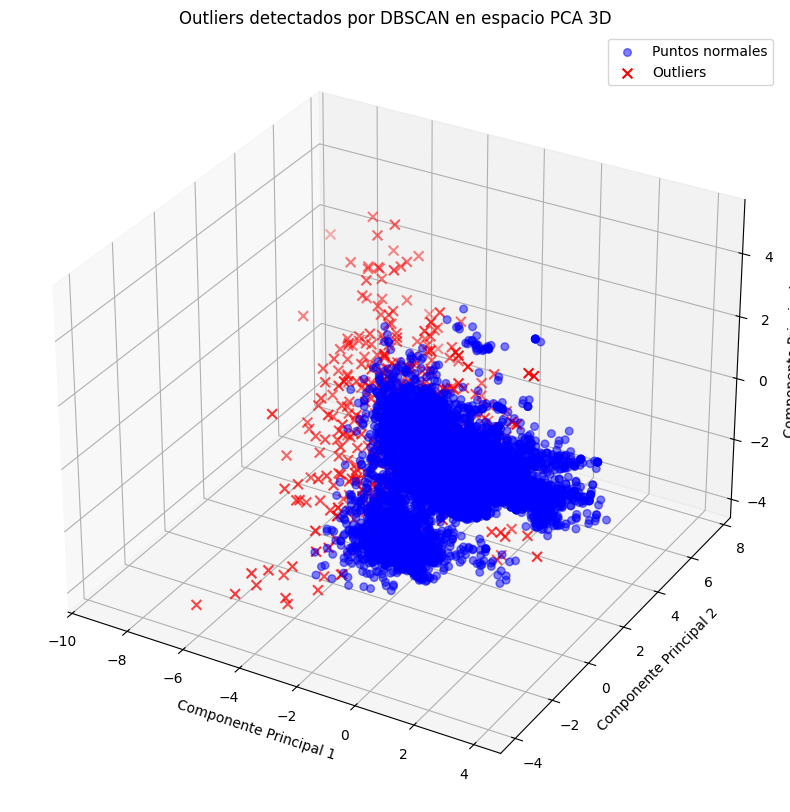

Varianza explicada por cada componente (3D):
[0.18515439 0.12588278 0.11231506]
Varianza total explicada: 42.34%


In [ ]:
# Aplicar PCA a 3 componentes
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Crear figura 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Puntos normales
normal_mask = dbscan_labels != -1
ax.scatter(
    X_pca_3d[normal_mask, 0],
    X_pca_3d[normal_mask, 1],
    X_pca_3d[normal_mask, 2],
    c='blue', alpha=0.5, s=30, label='Puntos normales'
)

# Outliers
outlier_mask = dbscan_labels == -1
ax.scatter(
    X_pca_3d[outlier_mask, 0],
    X_pca_3d[outlier_mask, 1],
    X_pca_3d[outlier_mask, 2],
    c='red', marker='x', s=50, label='Outliers'
)

ax.set_title('Outliers detectados por DBSCAN en espacio PCA 3D')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.legend()

plt.show()

# Varianza explicada por las 3 componentes
print("Varianza explicada por cada componente (3D):")
print(pca_3d.explained_variance_ratio_)
print(f"Varianza total explicada: {sum(pca_3d.explained_variance_ratio_) * 100:.2f}%")

#### Reflexiones al aplicar DBSCAN:

El modelo encontro un bajo porcentaje de outliers (371 (3.17%)), lo que me sorprende un poco porque habia dejado muchas variables sin limpiar sus outliers, por lo que puedo deducir que en realidad eran datos valiosos para el analisis.

En los graficos los outliers no forman un grupo, sino que estan dispersos en los extrmos de los graficos, lo que reafirma que son valores atipicos y no errores.

El PCA logra mostrar bien los outliers, con una varianza explicada del 42%.

# Referencias

Mencione los recursos utilizados

* Dataset utilizado: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset
* IA utlizada: ChatGPT y COPILOT de microsoft.
* Material de la materia Aprendizaje Automático (colabs y links de librerías como Sklearn)
* Canal de youtube que me ayuda siempre a poder interpretar y entender mejor el aprendizaje autómatico: https://www.youtube.com/@CodigoMaquina/videos
